In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
import xgboost as xgb
import lightgbm as lgb


In [4]:
df = pd.read_csv('Telco-Customer-Churn.csv')
print(df.head())
print(df.info())
print(df['Churn'].value_counts())  # Target variable


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
# Repeat for other categorical columns


In [6]:
scaler = StandardScaler()
df['MonthlyCharges'] = scaler.fit_transform(df[['MonthlyCharges']])


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True) # Drop rows with missing TotalCharges after conversion

X = df.drop(['Churn', 'customerID'], axis=1) # Drop customerID here
y = df['Churn'].map({'Yes':1, 'No':0})  # Encode target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in non_numeric:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Very important to transform test the same way

In [13]:
X = pd.get_dummies(X, drop_first=True)


In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


[[933 100]
 [191 183]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy: 0.7931769722814499


In [23]:
print(X_train.dtypes)


gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


[[933 100]
 [191 183]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy: 0.7931769722814499


In [25]:
print(confusion_matrix(y_test, y_pred))


[[933 100]
 [191 183]]


In [28]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [29]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


[[933 100]
 [191 183]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy: 0.7931769722814499


In [30]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {'max_depth':3, 'eta':0.1, 'objective':'binary:logistic'}
bst = xgb.train(params, dtrain, num_boost_round=100)
preds = bst.predict(dtest)


In [31]:
preds = bst.predict(dtest)


In [32]:
y_pred_xgb = [1 if p > 0.5 else 0 for p in preds]


In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))


[[932 101]
 [186 188]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.80      0.79      1407

Accuracy: 0.7960199004975125


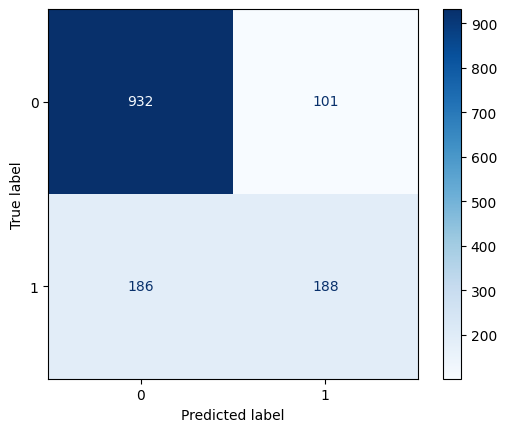

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Blues')


In [35]:
params = {
    'max_depth': 5,
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}


In [36]:
import xgboost as xgb

# Prepare DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set Parameters
params = {
    'max_depth': 5,
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train Model
bst = xgb.train(params, dtrain, num_boost_round=200)

# Predict
preds = bst.predict(dtest)
y_pred_xgb = [1 if p > 0.5 else 0 for p in preds]

# Evaluate
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))


[[927 106]
 [188 186]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy: 0.7910447761194029
